In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "data/OECD/all_countries_pay_gap.csv"
data = pd.read_csv(url)
data.head()

,COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,EMP9,Gender wage gap,ALL_PERSONS,All persons,TOTAL,Total,2000,2000,PC,Percentage,0,Units,NaN,NaN,17.2,NaN,NaN
1,AUS,Australia,EMP9,Gender wage gap,ALL_PERSONS,All persons,TOTAL,Total,2001,2001,PC,Percentage,0,Units,NaN,NaN,14.3,NaN,NaN
2,AUS,Australia,EMP9,Gender wage gap,ALL_PERSONS,All persons,TOTAL,Total,2002,2002,PC,Percentage,0,Units,NaN,NaN,15.0,NaN,NaN
3,AUS,Australia,EMP9,Gender wage gap,ALL_PERSONS,All persons,TOTAL,Total,2003,2003,PC,Percentage,0,Units,NaN,NaN,13.0,NaN,NaN
4,AUS,Australia,EMP9,Gender wage gap,ALL_PERSONS,All persons,TOTAL,Total,2004,2004,PC,Percentage,0,Units,NaN,NaN,14.4,NaN,NaN


In [4]:
data.describe()

,TIME,Time,PowerCode Code,Reference Period Code,Reference Period,Value,Flag Codes,Flags
count,527.000000,527.000000,527.0,0.0,0.0,527.000000,0.0,0.0
mean,2008.992410,2008.992410,0.0,NaN,NaN,15.335674,NaN,NaN
std,5.054827,5.054827,0.0,NaN,NaN,7.652646,NaN,NaN
min,2000.000000,2000.000000,0.0,NaN,NaN,0.000000,NaN,NaN
25%,2005.000000,2005.000000,0.0,NaN,NaN,9.950000,NaN,NaN
50%,2009.000000,2009.000000,0.0,NaN,NaN,15.000000,NaN,NaN
75%,2013.000000,2013.000000,0.0,NaN,NaN,19.200000,NaN,NaN
max,2018.000000,2018.000000,0.0,NaN,NaN,41.700000,NaN,NaN


In [5]:
unique_count = data.nunique()
print (unique_count)
# for i,v in enumerate(unique_count):
#     print(data.columns[i])

COU                       39
Country                   39
IND                        1
Indicator                  1
SEX                        1
Sex                        1
AGE                        1
Age Group                  1
TIME                      19
Time                      19
Unit Code                  1
Unit                       1
PowerCode Code             1
PowerCode                  1
Reference Period Code      0
Reference Period           0
Value                    222
Flag Codes                 0
Flags                      0
dtype: int64


Drop all columns with 1 unique value since that doesn't help in plotting

https://machinelearningmastery.com/basic-data-cleaning-for-machine-learning/


In [6]:
drop_col = [data.columns[i] for i, v in enumerate(unique_count) if v == 1 or v==0]
print(drop_col)
data.drop(drop_col, axis=1, inplace=True)

['IND', 'Indicator', 'SEX', 'Sex', 'AGE', 'Age Group', 'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode', 'Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags']


In [7]:
data.head()

,COU,Country,TIME,Time,Value
0,AUS,Australia,2000,2000,17.2
1,AUS,Australia,2001,2001,14.3
2,AUS,Australia,2002,2002,15.0
3,AUS,Australia,2003,2003,13.0
4,AUS,Australia,2004,2004,14.4


In [8]:
dups = data.duplicated()
# report if there are any duplicates
print(dups.any())

False


In [9]:
data.groupby('Time').count()['COU'].sort_values(ascending=False)

Time
2014    38
2010    38
2006    37
2002    31
2012    30
2011    30
2008    30
2009    29
2016    28
2015    28
2013    28
2007    28
2004    28
2005    27
2017    23
2003    23
2000    21
2001    19
2018    11
Name: COU, dtype: int64

In [10]:
data.rename(columns={ 'Value': 'Gender Pay Gap'}, inplace=True)


In [11]:
# latest gender pay gap for most countries

data_2016 = data.loc[data['Time'] == 2016]
print ('2016: ', data_2016['Country'].nunique())

data_2017 = data.loc[data['Time'] == 2017]
print ('2017: ', data_2017['Country'].nunique())

data_2018 = data.loc[data['Time'] == 2018]
print ('2018: ', data_2018['Country'].nunique())

data_16_17_18 = data.loc[data['Time'].isin([2016,2017,2018])]

2016:  28
2017:  23
2018:  11


In [12]:
data_16_17_18.head()

,COU,Country,TIME,Time,Gender Pay Gap
442,AUS,Australia,2016,2016,11.5
444,CZE,Czech Republic,2016,2016,16.0
453,KOR,Korea,2016,2016,36.7
454,MEX,Mexico,2016,2016,16.5
456,SVK,Slovak Republic,2016,2016,13.9


/Users/shivangi/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


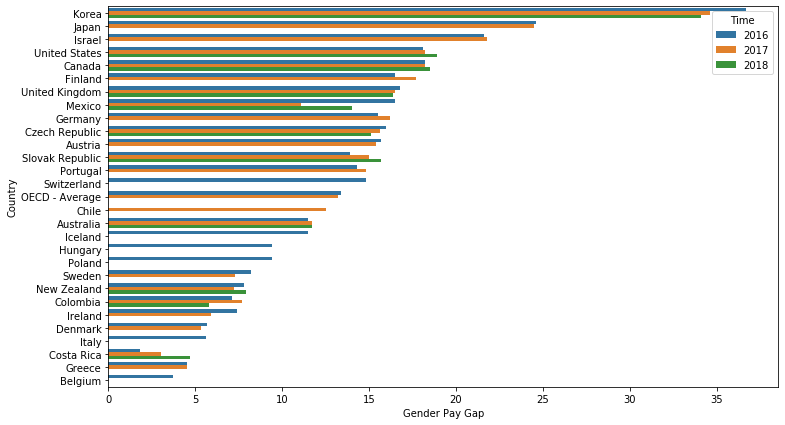

In [13]:
data_16_17_18.sort_values('Gender Pay Gap',ascending=False, inplace=True)
fig = plt.figure(figsize=(12,7))
ax = sns.barplot(x='Gender Pay Gap', y='Country',hue='Time',data=data_16_17_18)

/Users/shivangi/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


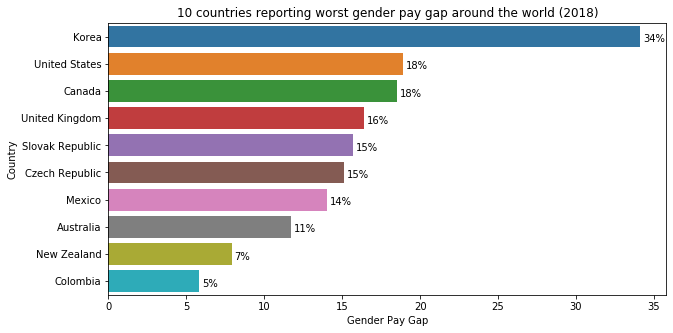

In [42]:
data_2018.sort_values('Gender Pay Gap',ascending=False, inplace=True)
fig = plt.figure(figsize=(10,5))
ax = sns.barplot(x='Gender Pay Gap', y='Country',data=data_2018[0:10])
ax.set_title("10 countries reporting worst gender pay gap around the world (2018)")
#plotting the top 10 worst gender pay gaps
for p in ax.patches:
    _x = p.get_x() + p.get_width() + float(0.2)
    _y = p.get_y() + p.get_height() + float(-0.2)
    value = int(p.get_width())
    ax.text(_x, _y, str(value) + "%", ha="left")


In [43]:
ax.figure.savefig('Visualizations/Top10Countries.png')

In [32]:
countries_to_plot = []
for i in range(0,10):
    countries_to_plot.append(data_2018.iloc[i]['Country'])
countries_to_plot

['Korea',
 'United States',
 'Canada',
 'United Kingdom',
 'Slovak Republic',
 'Czech Republic',
 'Mexico',
 'Australia',
 'New Zealand',
 'Colombia']

In [33]:
plotting_data = data.loc[data['Country'].isin(countries_to_plot)]

In [34]:
plotting_data.head()

,COU,Country,TIME,Time,Gender Pay Gap
0,AUS,Australia,2000,2000,17.2
1,AUS,Australia,2001,2001,14.3
2,AUS,Australia,2002,2002,15.0
3,AUS,Australia,2003,2003,13.0
4,AUS,Australia,2004,2004,14.4


Text(0.5, 1.0, 'Gender pay gap trend over 18 years')

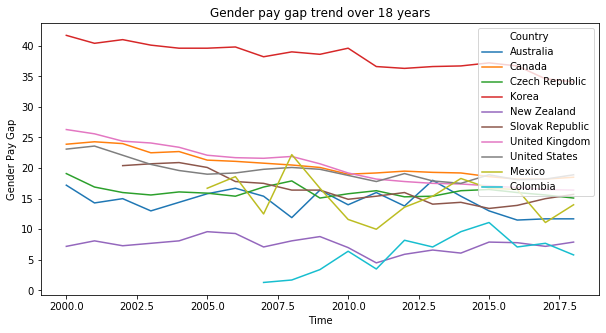

In [44]:
fig = plt.figure(figsize=(10,5))
sns_plot = sns.lineplot(x='Time',y='Gender Pay Gap',hue='Country', data=plotting_data, markers='o')
sns_plot.set_title('Gender pay gap trend over 18 years')

Not very obvious decreasing trend for the countries. Since most countries have not provided gender pay gap data (only 38 countries in 2014 in our dataset) this is only a partial story.

(year looks messed up)

In [45]:
sns_plot.figure.savefig('Visualizations/Country_time.png')